<a href="https://colab.research.google.com/github/S-MONISH18/AIML_project/blob/main/23it040_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 📦 Import necessary libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.datasets import load_wine, load_iris as skl_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
# ⚙️ Define a reusable SVM experiment function
def run_svm(X, y, name, rs=42):
    # Split dataset: 80% training, 20% testing
    Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=rs, stratify=y)

    # 1️⃣ Compare Linear vs RBF kernels
    for k in ("linear", "rbf"):
        model = SVC(kernel=k, random_state=rs).fit(Xtr, ytr)
        acc = accuracy_score(yte, model.predict(Xte))
        print(f"{name} | kernel={k:6} | Test Accuracy = {acc:.4f}")

    # 2️⃣ Tune hyperparameters for RBF
    grid = GridSearchCV(
        SVC(),
        {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
        cv=5,
        n_jobs=-1
    ).fit(Xtr, ytr)

    best = grid.best_estimator_
    print(f"\n>>> {name} best params: {grid.best_params_} | CV={grid.best_score_:.4f}")

    # 3️⃣ Evaluate best model on test data
    ypred = best.predict(Xte)
    print(f">>> {name} test_acc (best): {accuracy_score(yte, ypred):.4f}\n")
    print("Classification Report:\n", classification_report(yte, ypred))

    # 4️⃣ Confusion matrix visualization
    cm = confusion_matrix(yte, ypred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} — Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    return dict(name=name, best=grid.best_params_, cv=grid.best_score_, test_acc=accuracy_score(yte, ypred))


✅ Loaded Iris dataset from the web.
Iris Dataset | kernel=linear | Test Accuracy = 1.0000
Iris Dataset | kernel=rbf    | Test Accuracy = 0.9667

>>> Iris Dataset best params: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'} | CV=0.9833
>>> Iris Dataset test_acc (best): 0.9333

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



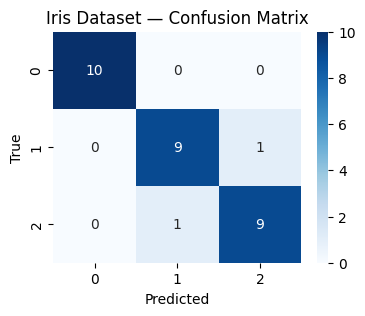

In [4]:
# 🌸 Load the Iris dataset
try:
    iris_url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
    iris = pd.read_csv(iris_url)
    X_iris = iris.drop(columns='species').values
    y_iris = iris['species'].astype('category').cat.codes.values
    print("✅ Loaded Iris dataset from the web.")
except Exception:
    print("⚠️ Could not load Iris from web — using sklearn fallback.")
    data = skl_iris()
    X_iris, y_iris = data.data, data.target

# Run SVM experiment
res_iris = run_svm(X_iris, y_iris, "Iris Dataset")


Wine Dataset | kernel=linear | Test Accuracy = 0.9444
Wine Dataset | kernel=rbf    | Test Accuracy = 0.6944

>>> Wine Dataset best params: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'} | CV=0.7470
>>> Wine Dataset test_acc (best): 0.7778

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.71      0.71      0.71        14
           2       0.60      0.60      0.60        10

    accuracy                           0.78        36
   macro avg       0.77      0.77      0.77        36
weighted avg       0.78      0.78      0.78        36



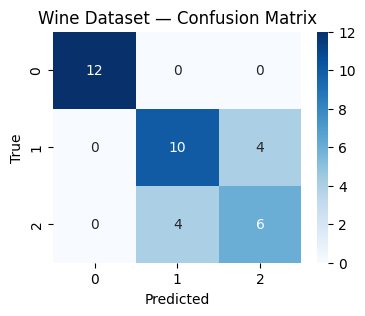

In [5]:
# 🍷 Load the Wine dataset (from sklearn)
wine = load_wine()
X_wine, y_wine = wine.data, wine.target

# Run SVM experiment
res_wine = run_svm(X_wine, y_wine, "Wine Dataset")


In [6]:
# Print summary of best models and accuracies
print("\nSummary of SVM Results:")
print("Iris:", res_iris)
print("Wine:", res_wine)



Summary of SVM Results:
Iris: {'name': 'Iris Dataset', 'best': {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}, 'cv': np.float64(0.9833333333333334), 'test_acc': 0.9333333333333333}
Wine: {'name': 'Wine Dataset', 'best': {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}, 'cv': np.float64(0.7470443349753694), 'test_acc': 0.7777777777777778}
